Problem 1: Data from yfinance
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

Facebook (META) / Apple (AAPL) / Amazon (AMZN) / Netflix (NFLX)/ Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

In [ ]:

# https://pypi.org/project/yfinance/

import yfinance as yf           # import the yfinance library to be able to fetch data for the five FAANG stocks.
import os                       # import the os library to handle file system operations.
from datetime import datetime   # import datetime to generate timestamps for the filenames.



def get_data():                     # Creation of the function get_data():

    stocks_list = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL'] # Creation of the List of FAANG stock tickers
    
    if not os.path.exists('data'):  # Creates the 'data' folder if it does not exist
           os.makedirs('data')

    for stock in stocks_list:       # Loop needed to generate individual files for each stock
         df = yf.download (tickers = stock, period ='5d', interval= '1h' , auto_adjust=False)  # Download hourly data for the last 5 days 
         timestamp = datetime.now().strftime ("%Y%m%d_%H%M%S")  # Get the current timestamp
         df.to_csv(f"data/{stock}_{timestamp}.csv")  # Save the data to a CSV file with the stock ticker and timestamp in the filename
         
    return "Download complete."

results = get_data()                # Call the function to get the stock data
print(results)                      # Print the results

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Download complete.


Problem 2: Plotting Data
Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

C:\Users\Julia Cruz\AppData\Local\Temp\ipykernel_13800\4092461324.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\Julia Cruz\AppData\Local\Temp\ipykernel_13800\4092461324.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\Julia Cruz\AppData\Local\Temp\ipykernel_13800\4092461324.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\Julia Cruz\AppData\Local\Temp\ipykernel_13800\4092461324.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back t


--- DEBUG arquivo: AAPL_20251218_150622.csv ---
                                   Adj Close              Close  \
Price                                                             
Ticker                                  AAPL               AAPL   
Datetime                                 NaN                NaN   
2025-12-12 14:30:00+00:00  277.8699951171875  277.8699951171875   
2025-12-12 15:30:00+00:00   277.739990234375   277.739990234375   
2025-12-12 16:30:00+00:00  277.8550109863281  277.8550109863281   

                                         High                 Low  \
Price                                                               
Ticker                                   AAPL                AAPL   
Datetime                                  NaN                 NaN   
2025-12-12 14:30:00+00:00   279.2200012207031  276.82000732421875   
2025-12-12 15:30:00+00:00   278.8599853515625  277.44000244140625   
2025-12-12 16:30:00+00:00  278.44000244140625   277.2807922363281  

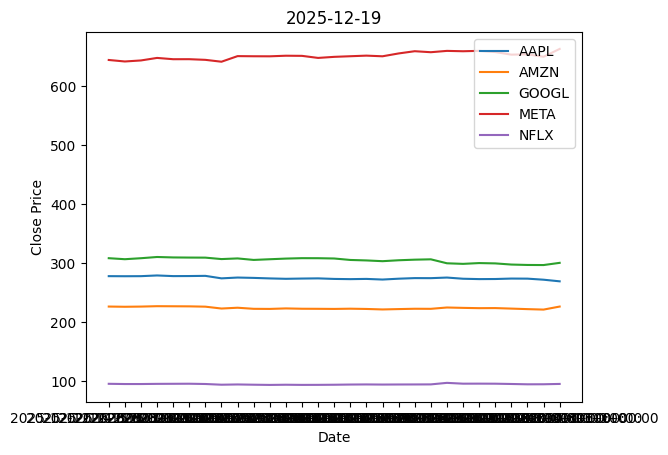

In [23]:
import os                              
# Lets you work with files and folders — like listing files, making folders, joining paths, etc.  
import pandas as pd                    
# Lets you read and play with tables of data (CSV files) using something called a DataFrame.
import matplotlib.pyplot as plt        
# Lets you make plots and graphs (line charts, bar charts, scatter plots…). plt is just a shortcut name.
from datetime import datetime          
# Lets you work with dates and times, like making timestamps or getting the current date.

def plot_data():                       
    """ 
    Creating a function called plot_data
    """
    
    folder = "data"           
    
    # Defining the folder name "data" where the CSV files I want to read are located.

    files = [
        
        f for f in os.listdir(folder) 
        if f.endswith(".csv")
        
        ]  
    
    # https://docs.python.org/3/library/os.html#os.listdir                                                                   
    os.makedirs("plots", exist_ok=True) 
    
    #creates a plot
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    plt.figure() 

    for file in files:
         # Join folder and filename into a valid path
        filepath = os.path.join(folder, file)

       # Reads the CSV file
        df = pd.read_csv(
            filepath, 
            index_col=0, 
            parse_dates=True
            ) 

        
        # DEBUG — view the contents and column types 
        print(f"\n--- DEBUG arquivo: {file} ---")
        print(df.head())
        
        # Correction of the Close column type
        print("\nTipos das colunas:")
        print(df.dtypes)
        #(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
        
        
        # Ensure the Close column is numeric
        # https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
        df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
        
        # Remove rows where Close is NaN
        # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
        df = df.dropna(subset=["Close"])

        # Plot Close prices
        # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.htm
        stock_name = file.split("_")[0]
        plt.plot(df.index, df["Close"], label=stock_name)

        # Save the plot
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title(datetime.now().strftime("%Y-%m-%d"))
    plt.legend()
    
    # Save the plot to the plots folder
    filename =datetime.now().strftime("stocks_%Y%m%d.png")
    save_path =os.path.join('plots',filename)
    
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
    plt.savefig(save_path)
    
    # display the plot
    plt.show()
    
if __name__ =="__main__" :
    # Ensures the function runs only when the script is executed directly
    # https://docs.python.org/3/library/__main__.html

# Runs the function
    plot_data()



2- Plotar todos os preços de fechamento em um único gráfico.
Cada ação deve ter sua própria linha.
Adicionar elementos no gráfico:
Rótulo do eixo X (ex.: Date).
Rótulo do eixo Y (ex.: Close Price).
Legenda (para diferenciar as ações).
Título do gráfico (incluir a data atual).

3- Criar a pasta plots/ se ainda não existir.
Salvar o gráfico na pasta plots/ com o nome no formato YYYYMMDD-HHmmss.png.
Mostrar o gráfico na tela (usando plt.show() ou equivalente).